In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pycountry
import plotly.express as px
from pywaffle import Waffle
%matplotlib inline

In [16]:
NGO_country_stats = pd.read_csv("2015_NGO_country_stats.csv", index_col = 0)

In [17]:
NGO_country_stats.head()

,Country,Count,ISO3
0,United States of America,228,USA
1,France,104,FRA
2,United Kingdom of Great Britain and Northern I...,92,GBR
3,Germany,74,DEU
4,Belgium,40,BEL


In [18]:
IGO_country_stats = pd.read_csv("2015_IGO_country_stats.csv", index_col = 0)

In [19]:
IGO_country_stats.head()

,Country,Count,ISO3
0,Switzerland,6,CHE
1,France,6,FRA
2,Finland,4,FIN
3,United Kingdom of Great Britain and Northern I...,4,GBR
4,Austria,3,AUT


In [21]:
IGO_country_stats.tail(20)

,Country,Count,ISO3
23,Sweden,1,SWE
24,Spain,1,ESP
25,Costa Rica,1,CRI
26,Belgium,1,BEL
27,China,1,CHN
28,Peru,1,PER
29,Canada,1,CAN
30,Togo,1,TGO
31,United Arab Emirates,1,ARE
32,Egypt,1,EGY


In [22]:
IGO_country_stats.head()

,Country,Count,ISO3
0,Switzerland,6,CHE
1,France,6,FRA
2,Finland,4,FIN
3,United Kingdom of Great Britain and Northern I...,4,GBR
4,Austria,3,AUT


In [23]:
def iso3_to_continent_name(iso3):
    try:
        iso2 = pycountry.country_alpha3_to_country_alpha2(iso3)
        continent_code = pycountry.country_alpha2_to_continent_code(iso2)
        continent_name = pycountry.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return ""

In [24]:
NGO_country_stats["Continent"] = [iso3_to_continent_name(iso3) for iso3 in list(NGO_country_stats.ISO3)]

In [25]:
NGO_country_stats

,Country,Count,ISO3,Continent
0,United States of America,228,USA,North America
1,France,104,FRA,Europe
2,United Kingdom of Great Britain and Northern I...,92,GBR,Europe
3,Germany,74,DEU,Europe
4,Belgium,40,BEL,Europe
...,...,...,...,...
77,El Salvador,1,SLV,North America
78,Congo,1,COG,Africa
79,Benin,1,BEN,Africa
80,Angola,1,AGO,Africa


In [26]:
NGO_country_stats[NGO_country_stats.Continent==""]

,Country,Count,ISO3,Continent
52,Holy See,1,VAT,


In [27]:
NGO_country_stats.Continent[52] = "Europe"

/var/folders/6_/r43fszfx0sq37gltljwc7qqr0000gn/T/ipykernel_64686/206994623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGO_country_stats.Continent[52] = "Europe"


In [29]:
NGO_country_stats[50:53]

,Country,Count,ISO3,Continent
50,Luxembourg,2,LUX,Europe
51,Morocco,2,MAR,Africa
52,Holy See,1,VAT,Europe


In [30]:
NGO_country_stats.to_csv("2015_NGO_country_stats.csv")

In [31]:
IGO_country_stats["Continent"] = [iso3_to_continent_name(iso3) for iso3 in list(IGO_country_stats.ISO3)]

In [32]:
IGO_country_stats.head()

,Country,Count,ISO3,Continent
0,Switzerland,6,CHE,Europe
1,France,6,FRA,Europe
2,Finland,4,FIN,Europe
3,United Kingdom of Great Britain and Northern I...,4,GBR,Europe
4,Austria,3,AUT,Europe


In [33]:
IGO_country_stats[IGO_country_stats.Continent==""]

,Country,Count,ISO3,Continent


In [34]:
IGO_country_stats.to_csv("2015_IGO_country_stats.csv")

In [35]:
NGO_country_stats.Continent.unique()

array(['North America', 'Europe', 'Asia', 'Oceania', 'South America',
       'Africa'], dtype=object)

In [36]:
unique_continents = list(NGO_country_stats.Continent.unique())

In [37]:
sum_by_continent = [NGO_country_stats.Count[NGO_country_stats.Continent == continent].sum() for continent in unique_continents]

In [38]:
sum_by_continent

[289, 478, 161, 31, 61, 58]

In [39]:
sum(sum_by_continent) == sum(NGO_country_stats.Count)

True

In [40]:
NGO_continent_stats = pd.DataFrame(list(zip(unique_continents, sum_by_continent)), 
                                  columns = ["Continent", "Count"])

In [41]:
NGO_continent_stats

,Continent,Count
0,North America,289
1,Europe,478
2,Asia,161
3,Oceania,31
4,South America,61
5,Africa,58


In [42]:
NGO_continent_stats.to_csv("2015_NGO_continent_stats.csv")

In [43]:
IGO_country_stats.Continent.unique()

array(['Europe', 'Africa', 'Asia', 'North America', 'South America',
       'Oceania'], dtype=object)

In [44]:
unique_continents = list(IGO_country_stats.Continent.unique())

In [45]:
sum_by_continent = [IGO_country_stats.Count[IGO_country_stats.Continent == continent].sum() for continent in unique_continents]

In [46]:
sum_by_continent

[32, 13, 11, 6, 4, 1]

In [47]:
sum(sum_by_continent) == sum(IGO_country_stats.Count)

True

In [48]:
IGO_continent_stats = pd.DataFrame(list(zip(unique_continents, sum_by_continent)), 
                                  columns = ["Continent", "Count"])

In [49]:
IGO_continent_stats

,Continent,Count
0,Europe,32
1,Africa,13
2,Asia,11
3,North America,6
4,South America,4
5,Oceania,1


In [52]:
IGO_continent_stats.to_csv("2015_IGO_continent_stats.csv")

The previous file, `2015_IGO_continent_stats.csv`, had to be modified so as to conform to the structure of the `2015_NGO_continent_stats.csv`(that is, the order of continents has to be the same for the pie chart to preserve the same color order!)

In [53]:
IGO_continent_stats = pd.read_csv("2015_IGO_continent_stats.csv", index_col=0)

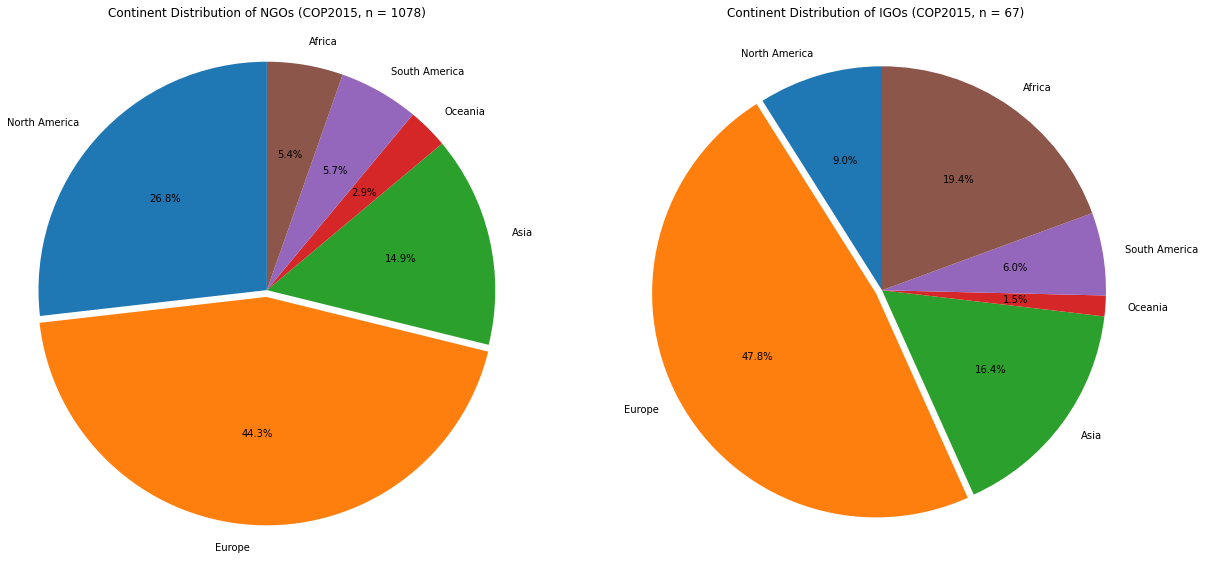

In [54]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.pie(NGO_continent_stats.Count,labels=NGO_continent_stats.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('Continent Distribution of NGOs (COP2015, n = 1078)')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(IGO_continent_stats.Count,labels=IGO_continent_stats.Continent,
        autopct='%1.1f%%',
        startangle = 90,
        explode = [0,0.03,0,0,0,0])
plt.title('Continent Distribution of IGOs (COP2015, n = 67)')
plt.axis('equal')
plt.savefig('COP2015_continent_distribution_NGOs_vs_IGOs.png', facecolor = "white")

# Income Group Statistics

We are using the most recent year classification for now, but at some point we may want to adjust the income classifications so that they track changes over multiple years and are pegged to the specific CoP round we're looking at. For example, maybe Belize is classified as a low-income country in 2017 but then moves to a lower-mid income country in 2018. **We may want to backtrack at some point and reclassify countries for each year to incorporate that change!**

In [55]:
df_income = pd.read_excel("WORLD_BANK_CLASS.xlsx", index_col = 0)
df_income.head()


,Code,Region,Income group,Lending category,Other (EMU or HIPC)
Economy,,,,,
Aruba,ABW,Latin America & Caribbean,High income,NaN,NaN
Afghanistan,AFG,South Asia,Low income,IDA,HIPC
Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,NaN
Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
Andorra,AND,Europe & Central Asia,High income,NaN,NaN


In [56]:
df_income[df_income["Income group"] == "nan"]

,Code,Region,Income group,Lending category,Other (EMU or HIPC)
Economy,,,,,


In [57]:
NGO_country_stats["Income_Group"] = len(NGO_country_stats.Country) * [np.nan]
IGO_country_stats["Income_Group"] = len(IGO_country_stats.Country) * [np.nan]

In [58]:
income_iso3_list = list(df_income.Code)
for i in range(len(NGO_country_stats.ISO3)):
    current_iso3 = str(NGO_country_stats.ISO3.iloc[i])
    try:
        index = income_iso3_list.index(current_iso3)
        NGO_country_stats.Income_Group.iloc[i] = str(df_income["Income group"].iloc[index])
    except:
        pass
        

/Users/stefan/py_38_env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [59]:
NGO_country_stats.head()

,Country,Count,ISO3,Continent,Income_Group
0,United States of America,228,USA,North America,High income
1,France,104,FRA,Europe,High income
2,United Kingdom of Great Britain and Northern I...,92,GBR,Europe,High income
3,Germany,74,DEU,Europe,High income
4,Belgium,40,BEL,Europe,High income


In [60]:
NGO_country_stats.Country[NGO_country_stats.Income_Group.isna()]

52    Holy See
Name: Country, dtype: object

**NOTE: Unfortunately, the Holy See is not in our current list of countries, so the organizations based there will not be counted in this current iteration.**

In [61]:
for i in range(len(IGO_country_stats.ISO3)):
    current_iso3 = str(IGO_country_stats.ISO3.iloc[i])
    try:
        index = income_iso3_list.index(current_iso3)
        IGO_country_stats.Income_Group.iloc[i] = str(df_income["Income group"].iloc[index])
    except:
        pass

/Users/stefan/py_38_env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
IGO_country_stats.Country[NGO_country_stats.Income_Group.isna()]

Series([], Name: Country, dtype: object)

In [63]:
IGO_country_stats.head()

,Country,Count,ISO3,Continent,Income_Group
0,Switzerland,6,CHE,Europe,High income
1,France,6,FRA,Europe,High income
2,Finland,4,FIN,Europe,High income
3,United Kingdom of Great Britain and Northern I...,4,GBR,Europe,High income
4,Austria,3,AUT,Europe,High income


In [64]:
NGO_country_stats.to_csv("2015_NGO_country_stats.csv")
IGO_country_stats.to_csv("2015_IGO_country_stats.csv")

In [65]:
income_unique = list(NGO_country_stats.Income_Group.unique())
income_unique.pop(-1)
income_unique

['High income', 'Upper middle income', 'Lower middle income', 'Low income']

In [66]:
sum_by_income_group = [NGO_country_stats.Count[NGO_country_stats.Income_Group == income_grp].sum() for income_grp in income_unique]
sum_by_income_group

[825, 139, 107, 6]

In [67]:
NGO_income_group_stats = pd.DataFrame(list(zip(income_unique, sum_by_income_group)), 
                                  columns = ["Income_Group", "Count"])


In [68]:
NGO_income_group_stats.head()

,Income_Group,Count
0,High income,825
1,Upper middle income,139
2,Lower middle income,107
3,Low income,6


In [69]:
sum_by_income_group = [IGO_country_stats.Count[IGO_country_stats.Income_Group == income_grp].sum() for income_grp in income_unique]
sum_by_income_group

[40, 9, 12, 5]

In [70]:
IGO_income_group_stats = pd.DataFrame(list(zip(income_unique, sum_by_income_group)), 
                                  columns = ["Income_Group", "Count"])

In [71]:
IGO_income_group_stats.head()

,Income_Group,Count
0,High income,40
1,Upper middle income,9
2,Lower middle income,12
3,Low income,5


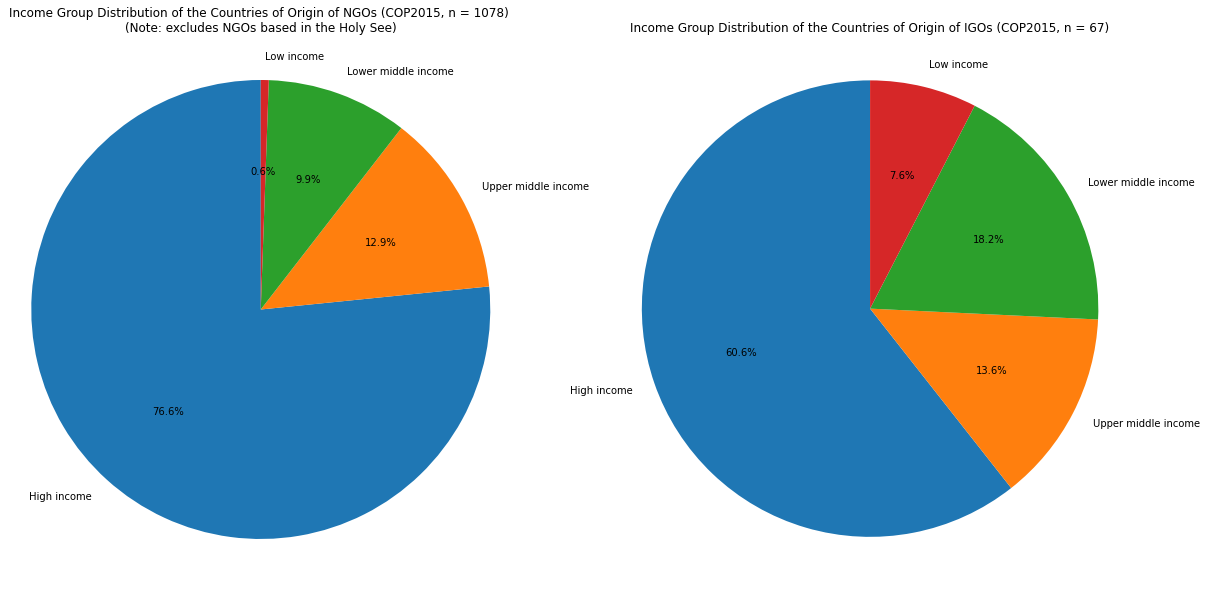

In [72]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.pie(NGO_income_group_stats.Count,labels=NGO_income_group_stats.Income_Group,
        autopct='%1.1f%%',
        startangle = 90)
plt.title('Income Group Distribution of the Countries of Origin of NGOs (COP2015, n = 1078) \n(Note: excludes NGOs based in the Holy See)')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(IGO_income_group_stats.Count,labels=IGO_income_group_stats.Income_Group,
        autopct='%1.1f%%',
        startangle = 90)
plt.title('Income Group Distribution of the Countries of Origin of IGOs (COP2015, n = 67)')
plt.axis('equal')
plt.savefig('COP2015_income_group_distribution_NGOs_vs_IGOs.png', facecolor = "white")

## WARNING: THE CODE FROM THIS POINT ONWARDS WAS NOT RUN FOR COP2015 AND IS COPIED FROM THE INFORMATION EXTRACTION PIPELINE OF COP2019. USE AS NEEDED WITH NECESSARY MODIFICATIONS ( NOT YET DONE!)

# Gender Breakdown of NGO/IGO Coordinators

In [3]:
NGO = pd.read_csv("NGOs_COP2019_complete.csv")
IGO = pd.read_csv("IGOs_COP2019_complete.csv")

In [4]:
def get_coordinator_gender_breakdown(coordinators):
    coord_list = list(coordinators)
    males = 0
    females = 0
    for coordinator in coord_list:
        coordinator = str(coordinator)
        if(("Mr." in coordinator) or ("M." in coordinator) or ("Sr." in coordinator) or ("Sr" in coordinator)):
            males = males + 1
        if(("Ms." in coordinator) or ("Ms" in coordinator) or ("Mrs." in coordinator) or ("Sra." in coordinator) or ("Sra" in coordinator) or ("Mme." in coordinator) or ("Mme" in coordinator)):
            females = females + 1
    return (males, females)

In [5]:
NGO_gender_breakdown = list(get_coordinator_gender_breakdown(NGO.coordinator))
IGO_gender_breakdown = list(get_coordinator_gender_breakdown(IGO.coordinator))

In [6]:
print(NGO_gender_breakdown)
print(IGO_gender_breakdown)

[562, 492]
[43, 30]


In [7]:
labels = ["Males\n(Mr./Sr./M.)", "Females\n(Ms./Mrs./Sra./Mme.)"]

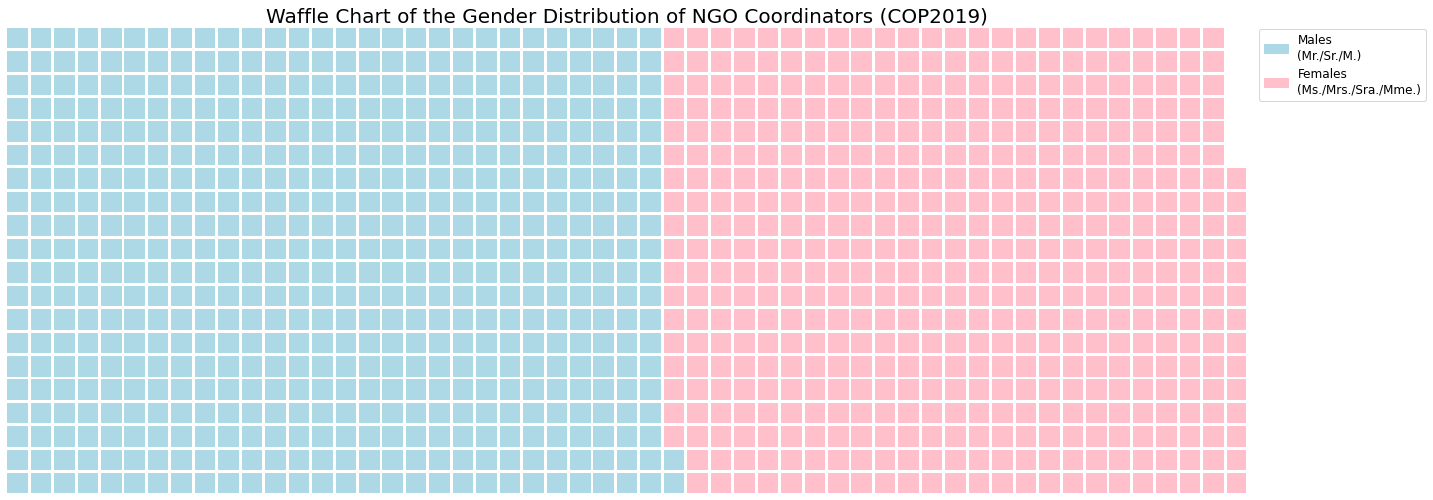

In [64]:
fig = plt.figure(
   FigureClass=Waffle,
   rows=20,
    figsize = (20,10),
   values=NGO_gender_breakdown,
    colors = ["lightblue", "pink"],
    facecolor = "white",
    title={
    'label': 'Waffle Chart of the Gender Distribution of NGO Coordinators (COP2019)',
    'loc': 'center',
    'fontdict': {
    'fontsize': 20}},
   labels=labels,
    legend={
        'loc': 'right',
        'ncol': 1,
        'bbox_to_anchor': (1.15, 0.92),
        'fontsize': 12
    })
plt.savefig('COP2019_WAFFLE_coordinator_gender_distrib_NGOs.png', facecolor = "white")

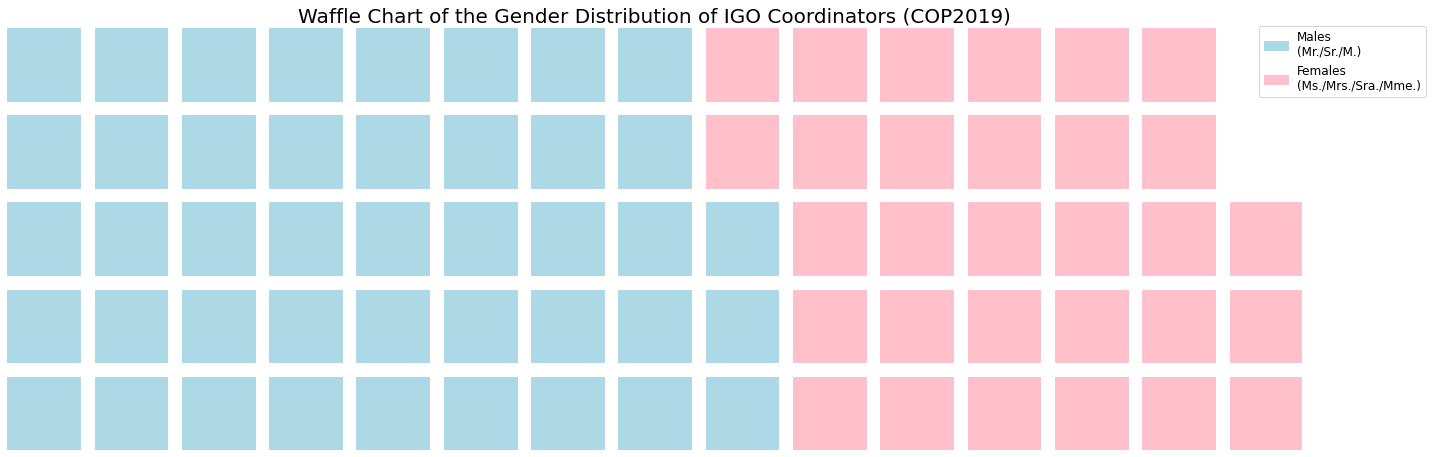

In [65]:
fig = plt.figure(
   FigureClass=Waffle,
   rows=5,
   figsize = (20,10),
   values=IGO_gender_breakdown,
    colors = ["lightblue", "pink"],
    facecolor = "white",
    title={
    'label': 'Waffle Chart of the Gender Distribution of IGO Coordinators (COP2019)',
    'loc': 'center',
    'fontdict': {
    'fontsize': 20}},
   labels=labels,
    legend={
        'loc': 'right',
        'ncol': 1,
        'bbox_to_anchor': (1.1, 0.92),
        'fontsize': 12
    })
plt.savefig('COP2019_WAFFLE_coordinator_gender_distrib_IGOs.png', facecolor = "white")

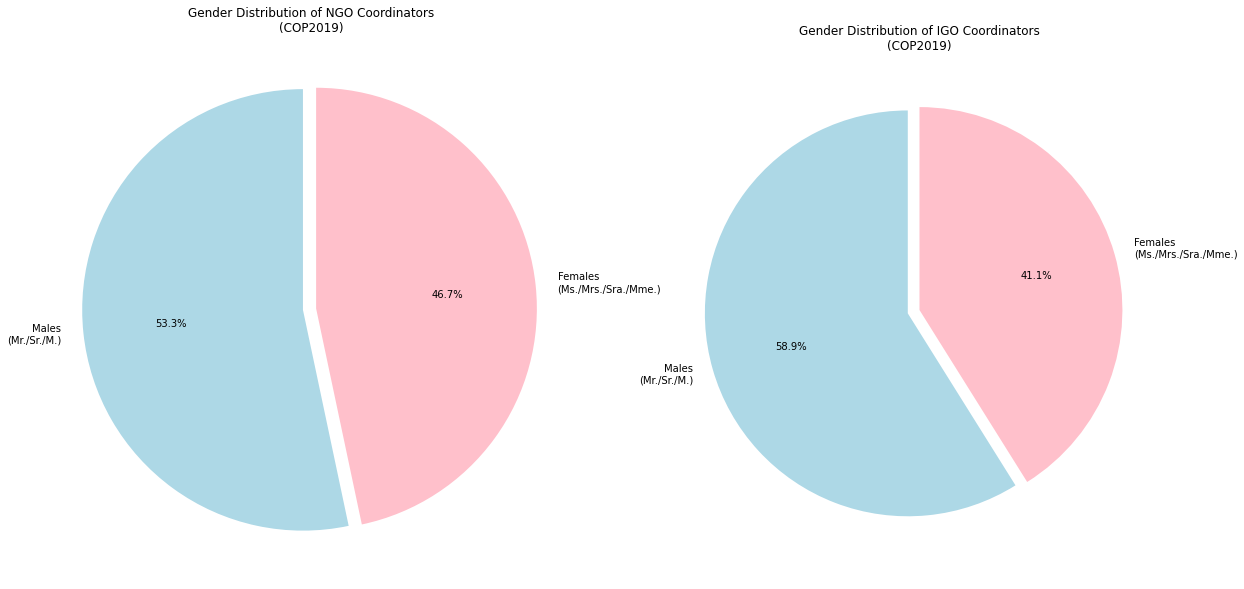

In [94]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.pie(NGO_gender_breakdown,labels=labels,
        autopct='%1.1f%%', 
        explode = (0.06, 0), 
        colors = ["lightblue", "pink"],
        startangle = 90)
plt.title('Gender Distribution of NGO Coordinators\n(COP2019)')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(IGO_gender_breakdown,labels=labels,
        autopct='%1.1f%%', 
        explode = (0.06, 0), 
        colors = ["lightblue", "pink"],
        startangle = 90)
plt.title('Gender Distribution of IGO Coordinators\n(COP2019)')
plt.savefig('COP2019_coordinator_gender_distrib_NGOs_vs_IGOs.png', facecolor = "white")


# Updated and Inverted Color-Coded Maps

In [170]:
NGO_country_stats = pd.read_csv("NGO_country_stats.csv", index_col=0)
IGO_country_stats = pd.read_csv("IGO_country_stats.csv", index_col=0)

In [171]:
all_countries = pd.read_excel("186_countries_list.xlsx")

In [172]:
all_countries.head()

,UNDP Country Name,iso code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Argentina,ARG


In [173]:
i = len(NGO_country_stats.ISO3)
j = len(IGO_country_stats.ISO3)
print(i, j)

75 48


In [174]:
all_iso3_codes = list(all_countries["iso code"])
for k in range(len(all_iso3_codes)):
    iso3 = all_iso3_codes[k]
    if iso3 not in list(NGO_country_stats.ISO3):
        NGO_country_stats.loc[i] = [str(all_countries.loc[k, "UNDP Country Name"]), 0, iso3, np.nan]
        i = i + 1
    if iso3 not in list(IGO_country_stats.ISO3):
        IGO_country_stats.loc[j] = [str(all_countries.loc[k, "UNDP Country Name"]), 0, iso3, np.nan]
        j = j + 1

In [175]:
NGO_country_stats[NGO_country_stats.Country == "Serbia"]

,Country,Count,ISO3,Continent
161,Serbia,0,SRB,NaN


In [193]:
fig = px.choropleth(NGO_country_stats, 
                    locations="ISO3",
                    color="Count", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale="reds_r",
                    title = "Color-Coded Map of the Country of Origin of NGOs participating at COP2019",
                    projection = "robinson",
                    range_color=[0,250])

fig.write_html("new map3 NGO.html")
fig.show()

In [75]:
scales = ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd']

In [76]:
NGO_country_stats.head()

,Country,Count,ISO3,Continent,Income_Group
0,United States of America,231,USA,North America,High income
1,United Kingdom of Great Britain and Northern I...,83,GBR,Europe,High income
2,Germany,76,DEU,Europe,High income
3,France,56,FRA,Europe,High income
4,Canada,50,CAN,North America,High income


In [85]:
fig = px.sunburst(NGO_country_stats, path=['Continent', 'Country'], values='Count',
                  color='Count', hover_data=['ISO3'],
                  color_continuous_scale='blues',
                  title = "Sunburst Plot of NGO Organization Count by Country (COP2019)",
                 range_color= [0, 250])
fig.write_html("sunburst_NGOs_1.html")
fig.show()

In [91]:
fig = px.sunburst(IGO_country_stats, path=['Continent', 'Country'], values='Count',
                  color='Count', hover_data=['ISO3'],
                  color_continuous_scale='reds',
                  title = "Sunburst Plot of IGO Organization Count by Country (COP2019)")
fig.write_html("sunburst_IGOs_1.html")
fig.show()

In [105]:
## IMPORTANT NOTE: THE FOLLOWING PLOT EXCLUDES THE HOLY SEE; COULD NOT FIND INCOME GROUP FOR HOLY SEE


fig = px.sunburst(NGO_country_stats.drop(66), path=['Income_Group', 'Country'], values='Count',
                  color='Count', hover_data=['ISO3'],
                  color_continuous_scale='blues',
                  range_color=[0,250],
                  title = "Sunburst Plot of NGO Organization Count by Income Group and Country (COP2019)")
fig.write_html("sunburst_NGOs_2.html")
fig.show()

In [106]:
## IMPORTANT NOTE: THE FOLLOWING PLOT EXCLUDES VENEZUELA; COULD NOT FIND INCOME GROUP DATA ON VENEZUELA...
fig = px.sunburst(IGO_country_stats[IGO_country_stats.ISO3 != "VEN"], 
                  path=['Income_Group', 'Country'], 
                  values='Count',
                  color='Count', hover_data=['ISO3'],
                  color_continuous_scale='reds',
                  title = "Sunburst Plot of IGO Organization Count by Income Group and Country (COP2019)")
fig.write_html("sunburst_IGOs_2.html")
fig.show()